# Notebook to reproduce _Supplementary Figure 8_ 

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

sys.path.append(os.path.join(sys.path[0], '../'))
from figures import plot_settings, plot_utils
from figures.additional_utils import ablation_plot_utils

In [2]:
fig_dir = 'supplementary/figure_8/'

if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

In [3]:
ablations = {
    'cVAE_catDims': [1, 2, 4, 8],
    'depth': [1, 2, 3],
    'width': [512, 1024, 2048],
    'beta': [0.0, 0.1667, 1.0],
    'ld': [8, 16, 32, 64, 128],
    'lr': [1e-4, 5e-4, 1e-3],
    'heads': [4, 8, 12],
    'refPoints': [3, 4, 5],
    'temporalDimMultiplier': [1, 2, 3],
    'transformer_catDims': [1, 2, 4, 8],
    'N_transfer': [0, 12, 24, 36, 48, 72, 84]
}

results = {
    hyperparameter: {i: pd.read_csv('results/EvoDevo/ablation_results/ablation_{}={}_filteredDataFrame.csv'.format(
        hyperparameter, i)) for i in ablations[hyperparameter]} for hyperparameter in ablations
}

In [4]:
metric_df = {}
met = 'rho (pe)'
for hyperparameter in ablations:
    df_dict = {'value': [], 'mean': [], 'std': [], **{seq: [] for seq in np.unique(results['ld'][8]['sequence'].tolist())}}
    for v in ablations[hyperparameter]:
        df_dict['value'].append(v)
        df = results[hyperparameter][v]
        df_dict['mean'].append(np.mean(df['gen rho (pe)'].tolist()))
        df_dict['std'].append(np.std(df['gen rho (pe)'].tolist()))
        for seq in np.unique(df['sequence'].tolist()): 
            df_dict[seq].append(df[df['sequence'] == seq]['gen rho (pe)'].iloc[0])
    metric_df[hyperparameter] = pd.DataFrame.from_dict(df_dict)

# Produce supplementary figure 8a-k

Supplementary Fig. 8a

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


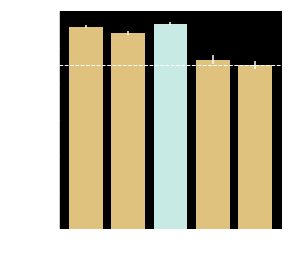

In [5]:
%matplotlib inline

ab = 'ld'
ablation_plot_utils.ablation_plot(
    r'Embedding dimension $d$', ablations[ab], metric_df[ab]['mean'].tolist(), None, None,
    [x/np.sqrt(48.) for x in metric_df[ab]['std'].tolist()], None, None,
    32, min_vals={'RMSE': 0, 'pearson_compare_genes': 0.7, 'pearson_compare_times': -0.1},
    best_baselines={met: ablation_plot_utils.get_best_baseline(met) for met in [
        'RMSE', 'pearson_compare_genes', 'pearson_compare_times']})
plt.savefig(fig_dir + 'figure_8a.pdf')

Supplementary Fig. 8b

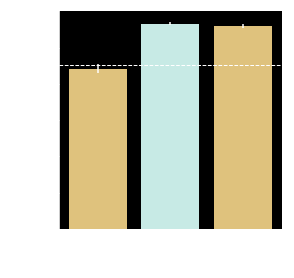

In [6]:
%matplotlib inline

ab = 'refPoints'
ablation_plot_utils.ablation_plot(
    r'Number of reference points $S+1$', ablations[ab], metric_df[ab]['mean'].tolist(), None, None,
    [x/np.sqrt(48.) for x in metric_df[ab]['std'].tolist()], None, None,
    4, min_vals={'RMSE': 0, 'pearson_compare_genes': 0.7, 'pearson_compare_times': -0.1},
    best_baselines={met: ablation_plot_utils.get_best_baseline(met) for met in [
        'RMSE', 'pearson_compare_genes', 'pearson_compare_times']})
plt.savefig(fig_dir + 'figure_8b.pdf')

Supplementary Fig. 8c

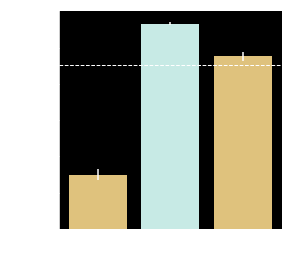

In [7]:
%matplotlib inline

ab = 'beta'
ablation_plot_utils.ablation_plot(
    r'Regularization weight ${\beta}$', ablations[ab], metric_df[ab]['mean'].tolist(), None, None,
    [x/np.sqrt(48.) for x in metric_df[ab]['std'].tolist()], None, None,
    0.1667, min_vals={'RMSE': 0, 'pearson_compare_genes': 0.7, 'pearson_compare_times': -0.1},
    best_baselines={met: ablation_plot_utils.get_best_baseline(met) for met in [
        'RMSE', 'pearson_compare_genes', 'pearson_compare_times']})
plt.savefig(fig_dir + 'figure_8c.pdf')

Supplementary Fig. 8d

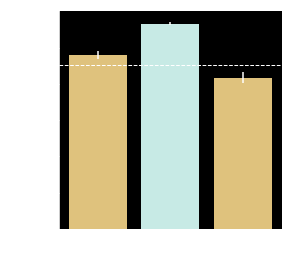

In [8]:
%matplotlib inline

ab = 'width'
ablation_plot_utils.ablation_plot(
    r'Autoencoder width', ablations[ab], metric_df[ab]['mean'].tolist(), None, None,
    [x/np.sqrt(48.) for x in metric_df[ab]['std'].tolist()], None, None,
    1024, min_vals={'RMSE': 0, 'pearson_compare_genes': 0.7, 'pearson_compare_times': -0.1},
    best_baselines={met: ablation_plot_utils.get_best_baseline(met) for met in [
        'RMSE', 'pearson_compare_genes', 'pearson_compare_times']})
plt.savefig(fig_dir + 'figure_8d.pdf')

Supplementary Fig. 8e

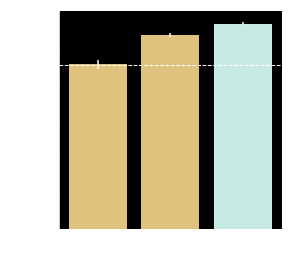

In [10]:
%matplotlib inline

ab = 'depth'
ablation_plot_utils.ablation_plot(
    r'Autoencoder depth', ablations[ab], metric_df[ab]['mean'].tolist(), None, None,
    [x/np.sqrt(48.) for x in metric_df[ab]['std'].tolist()], None, None,
    3, min_vals={'RMSE': 0, 'pearson_compare_genes': 0.7, 'pearson_compare_times': -0.1},
    best_baselines={met: ablation_plot_utils.get_best_baseline(met) for met in [
        'RMSE', 'pearson_compare_genes', 'pearson_compare_times']})
plt.savefig(fig_dir + 'figure_8e.pdf')

Supplementary Fig. 8f

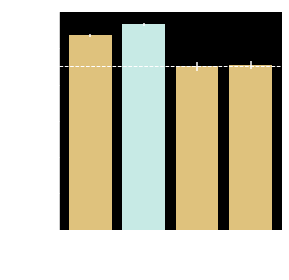

In [11]:
%matplotlib inline

ab = 'cVAE_catDims'
ablation_plot_utils.ablation_plot(
    r'Autoencoder dimension $d_{yae}$', ablations[ab], metric_df[ab]['mean'].tolist(), None, None,
    [x/np.sqrt(48.) for x in metric_df[ab]['std'].tolist()], None, None,
    2, min_vals={'RMSE': 0, 'pearson_compare_genes': 0.7, 'pearson_compare_times': -0.1},
    best_baselines={met: ablation_plot_utils.get_best_baseline(met) for met in [
        'RMSE', 'pearson_compare_genes', 'pearson_compare_times']})
plt.savefig(fig_dir + 'figure_8f.pdf')

Supplementary Fig. 8g

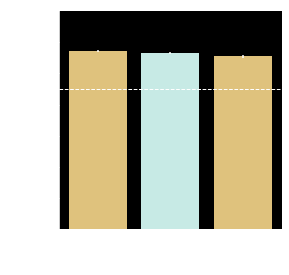

In [12]:
%matplotlib inline

ab = 'heads'
ablation_plot_utils.ablation_plot(
    r'Attention heads $H$', ablations[ab], metric_df[ab]['mean'].tolist(), None, None,
    [x/np.sqrt(48.) for x in metric_df[ab]['std'].tolist()], None, None,
    8, min_vals={'RMSE': 0, 'pearson_compare_genes': 0.7, 'pearson_compare_times': -0.1},
    best_baselines={met: ablation_plot_utils.get_best_baseline(met) for met in [
        'RMSE', 'pearson_compare_genes', 'pearson_compare_times']})
plt.savefig(fig_dir + 'figure_8g.pdf')

Supplementary Fig. 8h

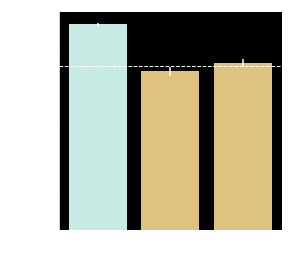

In [13]:
%matplotlib inline

ab = 'temporalDimMultiplier'
ablation_plot_utils.ablation_plot(
    r'Time embedding dimension $d_{temp}$', ablations[ab], metric_df[ab]['mean'].tolist(), None, None,
    [x/np.sqrt(48.) for x in metric_df[ab]['std'].tolist()], None, None,
    1, min_vals={'RMSE': 0, 'pearson_compare_genes': 0.7, 'pearson_compare_times': -0.1},
    best_baselines={met: ablation_plot_utils.get_best_baseline(met) for met in [
        'RMSE', 'pearson_compare_genes', 'pearson_compare_times']})
plt.savefig(fig_dir + 'figure_8h.pdf')

Supplementary Fig. 8i

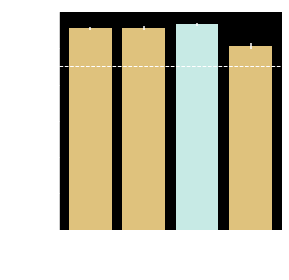

In [14]:
%matplotlib inline

ab = 'transformer_catDims'
ablation_plot_utils.ablation_plot(
    r'Transformer dimension $d_{ytr}$', ablations[ab], metric_df[ab]['mean'].tolist(), None, None,
    [x/np.sqrt(48.) for x in metric_df[ab]['std'].tolist()], None, None,
    4, min_vals={'RMSE': 0, 'pearson_compare_genes': 0.7, 'pearson_compare_times': -0.1},
    best_baselines={met: ablation_plot_utils.get_best_baseline(met) for met in [
        'RMSE', 'pearson_compare_genes', 'pearson_compare_times']})
plt.savefig(fig_dir + 'figure_8i.pdf')

Supplementary Fig. 8j

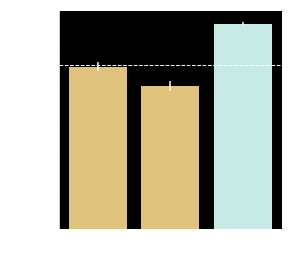

In [15]:
%matplotlib inline

ab = 'lr'
ablation_plot_utils.ablation_plot(
    r'Learning rate', ablations[ab], metric_df[ab]['mean'].tolist(), None, None,
    [x/np.sqrt(48.) for x in metric_df[ab]['std'].tolist()], None, None,
    1e-3, min_vals={'RMSE': 0, 'pearson_compare_genes': 0.7, 'pearson_compare_times': -0.1},
    best_baselines={met: ablation_plot_utils.get_best_baseline(met) for met in [
        'RMSE', 'pearson_compare_genes', 'pearson_compare_times']})
plt.savefig(fig_dir + 'figure_8j.pdf')

Supplementary Fig. k

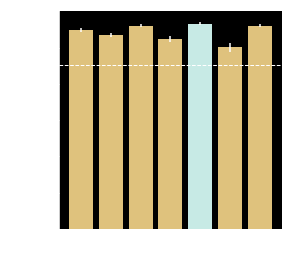

In [16]:
%matplotlib inline

ab = 'N_transfer'
ablation_plot_utils.ablation_plot(
    r'Number of generative datapoints', ablations[ab], metric_df[ab]['mean'].tolist(), None, None,
    [x/np.sqrt(48.) for x in metric_df[ab]['std'].tolist()], None, None,
    48, min_vals={'RMSE': 0, 'pearson_compare_genes': 0.7, 'pearson_compare_times': -0.1},
    best_baselines={met: ablation_plot_utils.get_best_baseline(met) for met in [
        'RMSE', 'pearson_compare_genes', 'pearson_compare_times']})
plt.savefig(fig_dir + 'figure_8k.pdf')